# Data preparation

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('insurance').getOrCreate()
df = spark.read.csv('/FileStore/tables/train.csv',inferSchema=True,header=True)
df.printSchema()

root
-- id: integer (nullable = true)
-- Gender: string (nullable = true)
-- Age: integer (nullable = true)
-- Driving_License: integer (nullable = true)
-- Region_Code: double (nullable = true)
-- Previously_Insured: integer (nullable = true)
-- Vehicle_Age: string (nullable = true)
-- Vehicle_Damage: string (nullable = true)
-- Annual_Premium: double (nullable = true)
-- Policy_Sales_Channel: double (nullable = true)
-- Vintage: integer (nullable = true)
-- Response: integer (nullable = true)

In [0]:
from pyspark.sql.types import StructField,StringType,IntegerType,DoubleType,StructType
df_schema = StructType([
    StructField('id', StringType(), True),
    StructField('Gender', StringType(), True),
    StructField('Age', IntegerType(), True),
    StructField('Driving_License', StringType(), True),
    StructField('Region_Code', StringType(), True),
    StructField('Previously_Insured', StringType(), True),
    StructField('Vehicle_Age', StringType(), True),
    StructField('Vehicle_Damage', StringType(), True),
    StructField('Annual_Premium', DoubleType(), True),
    StructField('Policy_Sales_Channel', StringType(), True),
    StructField('Vintage', IntegerType(), True),
    StructField('Response', IntegerType(), True)
    ])
df = spark.createDataFrame(df.collect(),schema = df_schema)
df.printSchema()

root
-- id: string (nullable = true)
-- Gender: string (nullable = true)
-- Age: integer (nullable = true)
-- Driving_License: string (nullable = true)
-- Region_Code: string (nullable = true)
-- Previously_Insured: string (nullable = true)
-- Vehicle_Age: string (nullable = true)
-- Vehicle_Damage: string (nullable = true)
-- Annual_Premium: double (nullable = true)
-- Policy_Sales_Channel: string (nullable = true)
-- Vintage: integer (nullable = true)
-- Response: integer (nullable = true)

In [0]:
df.count()

Out[3]: 381109

###Correct schema of some variables

### As schema shows, each column might have null values, so we'll deal with missing value later

In [0]:
df.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

# now let's check nulls for each column 
### For nulls(missing values), we can impute them by statistical values or drop it if it had too much

In [0]:
from pyspark.sql.functions import*
from pyspark.sql.functions import when,count,col
null_report=df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
print("Number of Rows: ",df.count(), "   Number of Columns: ",len(df.columns))
null_report.show()

Number of Rows: 381109 Number of Columns: 12
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+

### Surprisingly, the data has no nulls, so we can do some descriptive analysis

In [0]:
df.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

In [0]:
# Here numercal columns are picked for descriptive analysis 
df.select('Annual_Premium','Vintage','Age').describe().show()

+-------+------------------+------------------+------------------+
summary| Annual_Premium| Vintage| Age|
+-------+------------------+------------------+------------------+
 count| 381109| 381109| 381109|
 mean|30564.389581458323|154.34739667654136|38.822583565331705|
 stddev|17213.155056980144| 83.67130362658735|15.511611018095339|
 min| 2630.0| 10| 20|
 max| 540165.0| 299| 85|
+-------+------------------+------------------+------------------+

### From the descriptive statistic, there is no issue. Now, let us remove outliers.

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd
import random as rnd 

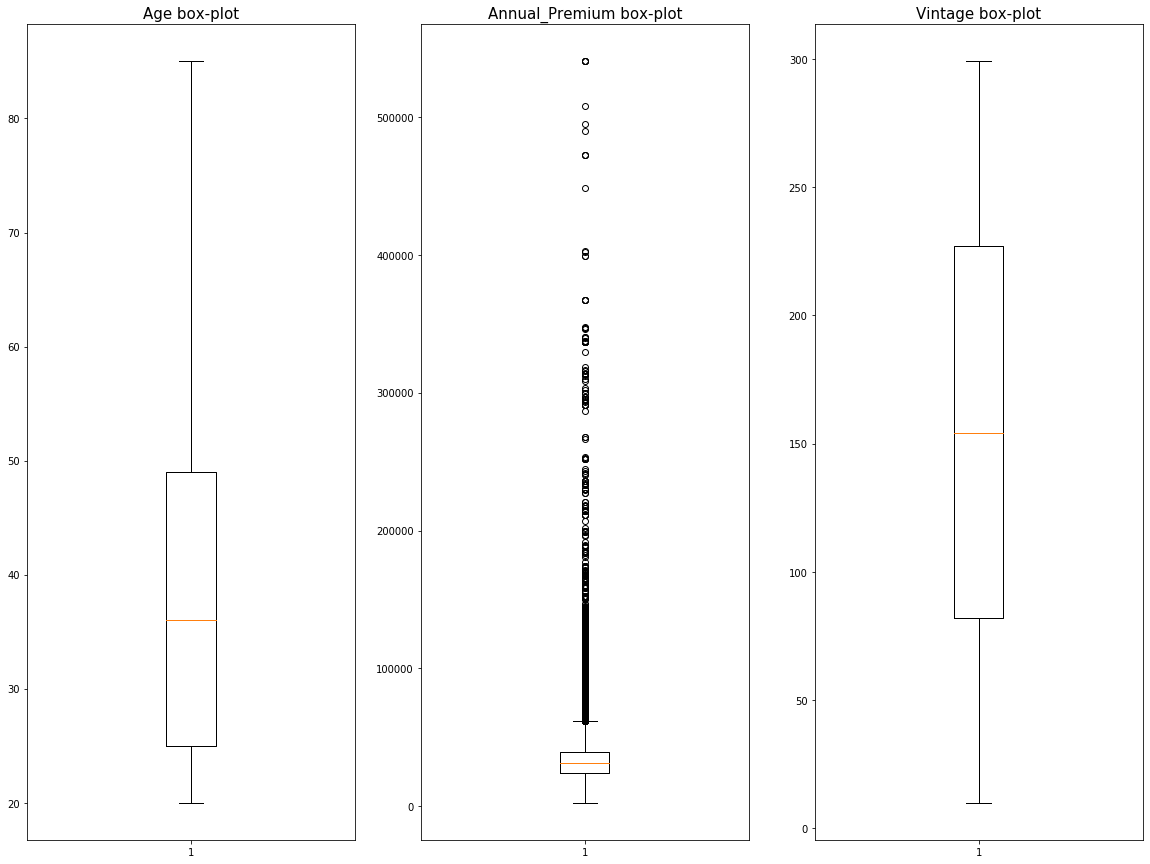

In [0]:
df1=df.toPandas()
f,(ax1, ax2, ax3) = plt.subplots(1,3, sharey=False,figsize=(20,15)) 
ax1.boxplot(df1['Age'])
ax1.set_title("Age box-plot", fontsize=15)
ax2.boxplot(df1['Annual_Premium'])
ax2.set_title("Annual_Premium box-plot", fontsize=15)
ax3.boxplot(df1['Vintage'])
ax3.set_title("Vintage box-plot", fontsize=15)

### According to the box-plots, there are some outliers in 'Annual_Premium'

### Next, we use the interquantile rule to delete outliers.

In [0]:
quantiles = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in ["Age", "Annual_Premium","Vintage"]
}
quantiles

Out[10]: {'Age': {'q1': 25.0, 'q3': 49.0},
 'Annual_Premium': {'q1': 24405.0, 'q3': 39400.0},
 'Vintage': {'q1': 82.0, 'q3': 227.0}}

In [0]:
for i in quantiles:
    iqr = quantiles[i]['q3'] - quantiles[i]['q1']
    quantiles[i]['lower_bound'] = quantiles[i]['q1'] - (iqr * 1.5)
    quantiles[i]['upper_bound'] = quantiles[i]['q3'] + (iqr * 1.5)
print(quantiles)

{'Age': {'q1': 25.0, 'q3': 49.0, 'lower_bound': -11.0, 'upper_bound': 85.0}, 'Annual_Premium': {'q1': 24405.0, 'q3': 39400.0, 'lower_bound': 1912.5, 'upper_bound': 61892.5}, 'Vintage': {'q1': 82.0, 'q3': 227.0, 'lower_bound': -135.5, 'upper_bound': 444.5}}

In [0]:
import pyspark.sql.functions as f
df_clean=df.select(
    "*",
    *[
        f.when(
            f.col(c).between(quantiles[c]['lower_bound'], quantiles[c]['upper_bound']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in ["Age", "Annual_Premium","Vintage"]
    ]
)
df_clean.show(10)

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Age_out|Annual_Premium_out|Vintage_out|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1| 0| 0| 0|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0| 0| 0| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1| 0| 0| 0|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0| 0| 0| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0| 0| 0| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0| 0| 0| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0| 0| 0| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1| 0| 0| 0|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0| 0| 0| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 0| 0| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+
only showing top 10 rows

In [0]:
from pyspark.sql.functions import col
df_clean=df_clean.withColumn("outliers", col("Age_out")+col("Annual_Premium_out")+col("Vintage_out"))
df_clean.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Age_out|Annual_Premium_out|Vintage_out|outliers|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1| 0| 0| 0| 0|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0| 0| 0| 0| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1| 0| 0| 0| 0|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0| 0| 0| 0| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0| 0| 0| 0| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0| 0| 0| 0| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0| 0| 0| 0| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1| 0| 0| 0| 0|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0| 0| 0| 0| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 0| 0| 0| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1| 0| 0| 0| 0|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0| 0| 0| 0| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0| 0| 0| 0| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0| 0| 0| 0| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0| 0| 0| 0| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1| 0| 0| 0| 0|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0| 0| 0| 0| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0| 0| 0| 0| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0| 0| 0| 0| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1| 0| 0| 0| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+-------+------------------+-----------+--------+
only showing top 20 rows

In [0]:
#removing outliers to make a better dataset
df_clean = df_clean.filter((df_clean.outliers==0))
df_new = df_clean.select(['id','Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel','Vintage','Response'])
df_new.select('Age','Annual_Premium','Vintage').describe().show()

+-------+------------------+------------------+------------------+
summary| Age| Annual_Premium| Vintage|
+-------+------------------+------------------+------------------+
 count| 370789| 370789| 370789|
 mean| 38.67034351072982|29264.643972717637|154.34544174719315|
 stddev|15.440166283175778|14743.056656364859| 83.67047843171547|
 min| 20| 2630.0| 10|
 max| 85| 61892.0| 299|
+-------+------------------+------------------+------------------+

###Let check how many percentage of data we have left.

In [0]:
df_new.count()/df.count()*100

Out[15]: 97.29211327992779

### After deleting outliers, we still have about 97% of the data left. Therefore, it is enough to use in the next steps.

# Data visualization

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd
import random as rnd 
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import SparkContext

In [0]:
df_rs=df_new.select('Response').toPandas()
df_rs.shape

Out[17]: (370789, 1)

###  Response (Target variable)

In [0]:
# Create function for pie-chart
def draw_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = data[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=180, title = title)
    ax.set_ylabel('')  
    
#66b3ff = blue
#ff9999 = light red
#99ff99 = green
#ffcc99 = orange
#c2c2f0 = purple
#ffb3e6 = pink
#ff6666 = red

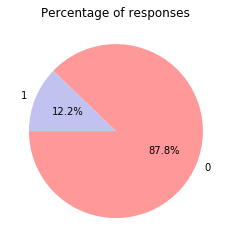

In [0]:
fig = plt.gcf()
draw_pie_chart(df_rs, 'Response', fig, {0: '0', 1: '1'}, 'Percentage of responses')

#### The data is unbalanced. Therefore, we have to resampling before building a prediction model.

In [0]:
df_pd=df_new.toPandas()
df_rs_no = df_pd[df_pd.Response == '0']
df_rs_yes = df_pd[df_pd.Response == '1']

/databricks/python/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 res_values = method(rvalues)

#### Gender , Driving_License , Previously_Insured , Vehicle_Age , and Vehicle_Damage

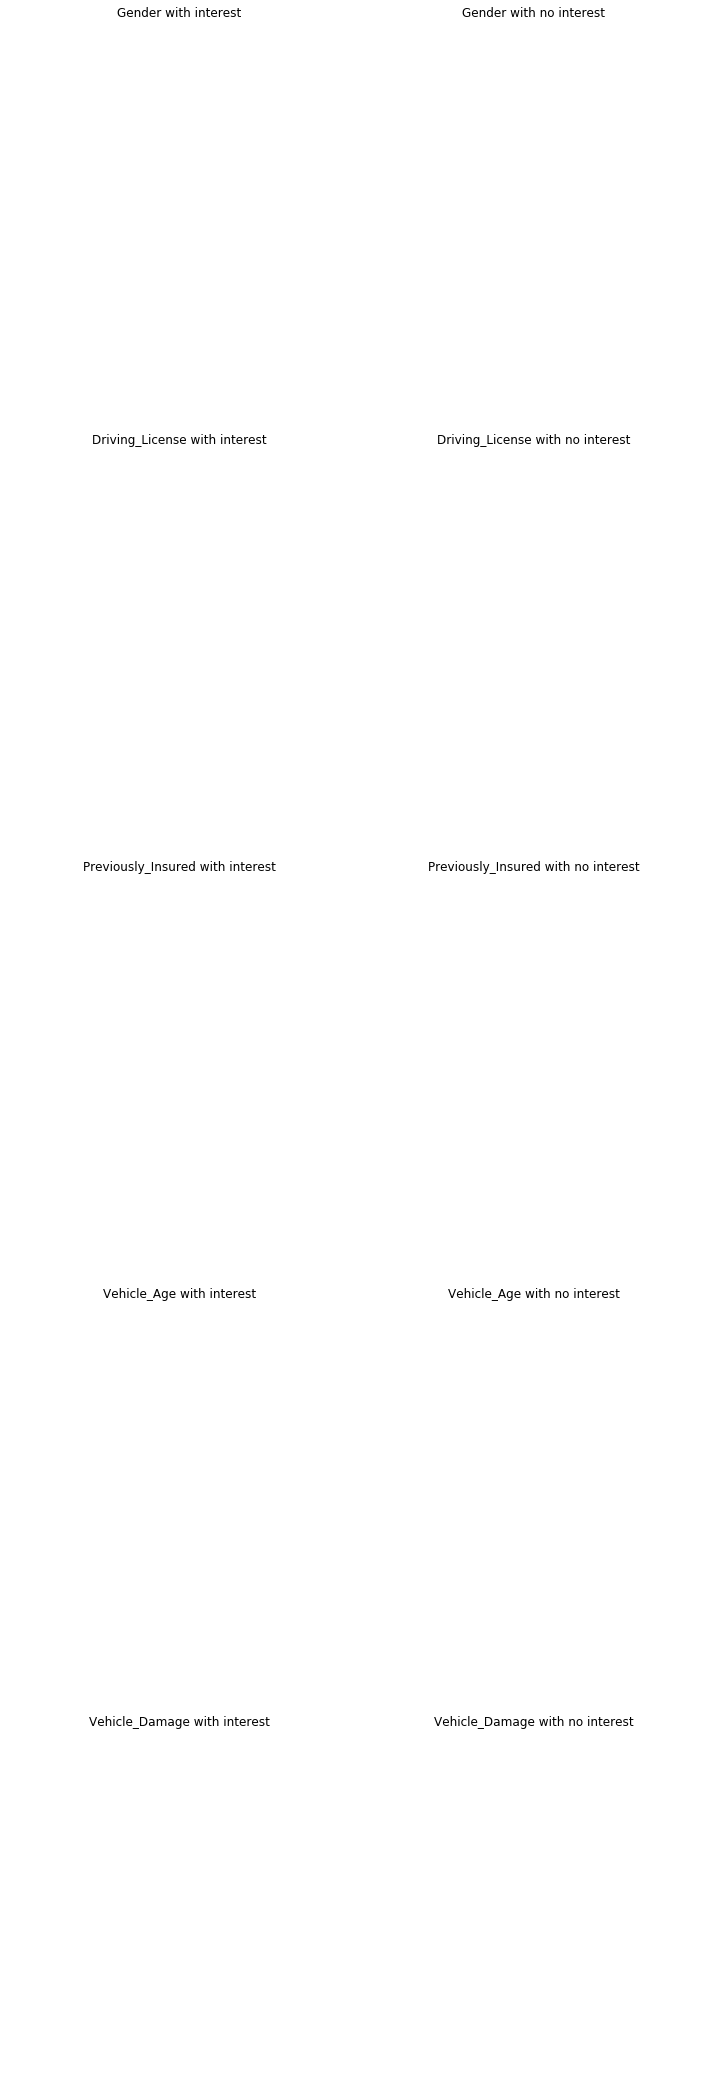

In [0]:
fig = plt.gcf()
fig.set_size_inches(10, 30)
grid_rows = 5
grid_cols = 2

# Draw Gender Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_pie_chart(df_rs_yes, 'Gender', fig, {0: 'Female', 1: 'Male'}, 'Gender with interest')

plt.subplot(grid_rows, grid_cols, 2)
draw_pie_chart(df_rs_no , 'Gender', fig, {0: 'Female', 1: 'Male'}, 'Gender with no interest')

# Draw Driving_License chart
plt.subplot(grid_rows, grid_cols, 3)
draw_pie_chart(df_rs_yes, 'Driving_License', fig, {0:'0', 1:'1'}, 'Driving_License with interest')

plt.subplot(grid_rows, grid_cols, 4)
draw_pie_chart(df_rs_no, 'Driving_License', fig, {0:'0', 1:'1'}, 'Driving_License with no interest')

# Draw Previously_Insured chart
plt.subplot(grid_rows, grid_cols, 5)
draw_pie_chart(df_rs_yes, 'Previously_Insured', fig, {0:'0', 1:'1'}, 'Previously_Insured with interest')

plt.subplot(grid_rows, grid_cols, 6)
draw_pie_chart(df_rs_no , 'Previously_Insured', fig, {0:'0', 1:'1'}, 'Previously_Insured with no interest')

# Draw Vehicle_Age status chart
plt.subplot(grid_rows, grid_cols, 7)
draw_pie_chart(df_rs_yes, 'Vehicle_Age', fig, {0:'< 1 Year', 1:'1-2 Year',2:'> 2 Years'}, 'Vehicle_Age with interest')

plt.subplot(grid_rows, grid_cols, 8)
draw_pie_chart(df_rs_no , 'Vehicle_Age', fig, {0:'< 1 Year', 1:'1-2 Year',2:'> 2 Years'}, 'Vehicle_Age with no interest')

# Draw Vehicle_Damage type chart
plt.subplot(grid_rows, grid_cols, 9)
draw_pie_chart(df_rs_yes, 'Vehicle_Damage', fig, {0:'Yes', 1:'No'}, 'Vehicle_Damage with interest')

plt.subplot(grid_rows, grid_cols, 10)
draw_pie_chart(df_rs_no , 'Vehicle_Damage', fig, {0:'Yes', 1:'No'}, 'Vehicle_Damage with no interest')


fig.tight_layout()
plt.show()

###  Age , Annual_Premium , and Vintage

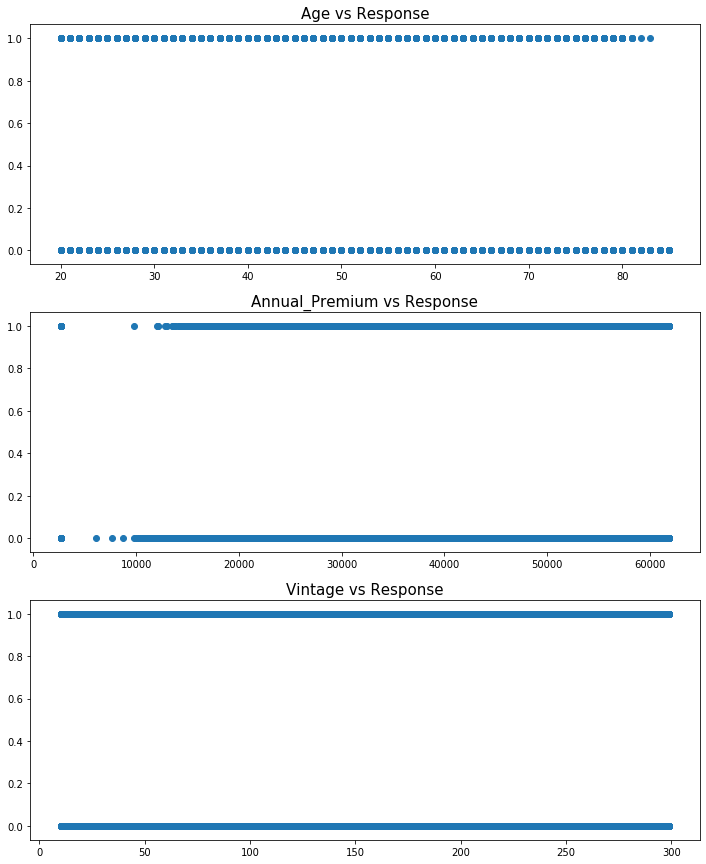

In [0]:
f,(ax1, ax2, ax3) = plt.subplots(3,1, sharey=True,figsize=(12,15)) 
ax1.scatter(df_pd['Age'],df_pd['Response'])
ax1.set_title("Age vs Response", fontsize=15)
ax2.scatter(df_pd['Annual_Premium'],df_pd['Response'])
ax2.set_title("Annual_Premium vs Response", fontsize=15)
ax3.scatter(df_pd['Vintage'],df_pd['Response'])
ax3.set_title("Vintage vs Response", fontsize=15)

In [0]:
# Conlusion so far: data itself is perfect, but its a good try for us to observe the data

# Resamlping for unbalaneced data

In [0]:
#oversampling is implemented 
from pyspark.sql.functions import col, explode, array, lit
major_df = df_new.filter(col("Response") == 0)
minor_df = df_new.filter(col("Response") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))
a = range(ratio)
oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a ]))).drop('dummy')
df_new1 = major_df.unionAll(oversampled_df)
df_new1.show()

ratio: 7
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0|
 21| Male| 65| 1| 28.0| 0| 1-2 Year| Yes| 41184.0| 124.0| 116| 0|
 22| Male| 49| 1| 28.0| 0| 1-2 Year| Yes| 50791.0| 124.0| 177| 0|
 23| Male| 23| 1| 50.0| 1| < 1 Year| No| 45283.0| 152.0| 232| 0|
 24| Male| 44| 1| 28.0| 0| 1-2 Year| Yes| 41852.0| 163.0| 60| 0|
 25| Male| 34| 1| 15.0| 1| 1-2 Year| No| 38111.0| 152.0| 180| 0|
 28| Male| 26| 1| 6.0| 1| < 1 Year| No| 19135.0| 152.0| 57| 0|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

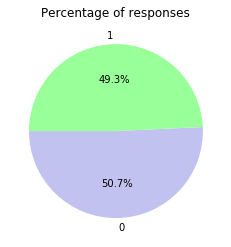

In [0]:
#Now let's check wether the data is balanced then we'll enter model building part.
df_rs1=df_new1.select('Response').toPandas()
fig = plt.gcf()
draw_pie_chart(df_rs1, 'Response', fig, {0: '0', 1: '1'}, 'Percentage of responses')

### The data is balanced now, next is model budilding for prediction!

# Machine Learning Model Building

In [0]:
# lastest dataset : df_new1 

### One-hot Ecoding

In [0]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                StringIndexer,OneHotEncoder)

In [0]:
VA_indexer = StringIndexer(inputCol='Vehicle_Age',outputCol='Vehicle_AgeIndex')
VD_indexer = StringIndexer(inputCol='Vehicle_Damage',outputCol='Vehicle_DamageIndex')
Gen_indexer = StringIndexer(inputCol='Gender',outputCol='GenderIndex')
DL_indexer = StringIndexer(inputCol='Driving_License',outputCol='Driving_LicenseIndex')
RC_indexer = StringIndexer(inputCol='Region_Code',outputCol='Region_CodeIndex')
PSC_indexer = StringIndexer(inputCol='Policy_Sales_Channel',outputCol='Policy_Sales_ChannelIndex')
PI_indexer = StringIndexer(inputCol='Previously_Insured',outputCol='Previously_InsuredIndex')

In [0]:
'''VA_encoder = OneHotEncoder(inputCol='Vehicle_AgeIndex',outputCol='Vehicle_AgeVec')
VD_encoder = OneHotEncoder(inputCol='Vehicle_DamageIndex',outputCol='Vehicle_DamageVec')
Gen_encoder = OneHotEncoder(inputCol='GenderIndex',outputCol='GenderVec')
DL_encoder=OneHotEncoder(inputCol='Driving_LicenseIndex',outputCol='Driving_LicenseVec')
RC_encoder=OneHotEncoder(inputCol='Region_CodeIndex',outputCol='Region_CodeVec')
PSC_encoder=OneHotEncoder(inputCol='Policy_Sales_ChannelIndex',outputCol='Policy_Sales_ChannelVec')
PI_encoder=OneHotEncoder(inputCol='Previously_InsuredIndex',outputCol='Previously_InsuredVec')'''

Out[29]: "VA_encoder = OneHotEncoder(inputCol='Vehicle_AgeIndex',outputCol='Vehicle_AgeVec')\nVD_encoder = OneHotEncoder(inputCol='Vehicle_DamageIndex',outputCol='Vehicle_DamageVec')\nGen_encoder = OneHotEncoder(inputCol='GenderIndex',outputCol='GenderVec')\nDL_encoder=OneHotEncoder(inputCol='Driving_LicenseIndex',outputCol='Driving_LicenseVec')\nRC_encoder=OneHotEncoder(inputCol='Region_CodeIndex',outputCol='Region_CodeVec')\nPSC_encoder=OneHotEncoder(inputCol='Policy_Sales_ChannelIndex',outputCol='Policy_Sales_ChannelVec')\nPI_encoder=OneHotEncoder(inputCol='Previously_InsuredIndex',outputCol='Previously_InsuredVec')"

In [0]:
df_new.show()

+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 1| Male| 44| 1| 28.0| 0| > 2 Years| Yes| 40454.0| 26.0| 217| 1|
 2| Male| 76| 1| 3.0| 0| 1-2 Year| No| 33536.0| 26.0| 183| 0|
 3| Male| 47| 1| 28.0| 0| > 2 Years| Yes| 38294.0| 26.0| 27| 1|
 4| Male| 21| 1| 11.0| 1| < 1 Year| No| 28619.0| 152.0| 203| 0|
 5|Female| 29| 1| 41.0| 1| < 1 Year| No| 27496.0| 152.0| 39| 0|
 6|Female| 24| 1| 33.0| 0| < 1 Year| Yes| 2630.0| 160.0| 176| 0|
 7| Male| 23| 1| 11.0| 0| < 1 Year| Yes| 23367.0| 152.0| 249| 0|
 8|Female| 56| 1| 28.0| 0| 1-2 Year| Yes| 32031.0| 26.0| 72| 1|
 9|Female| 24| 1| 3.0| 1| < 1 Year| No| 27619.0| 152.0| 28| 0|
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 11|Female| 47| 1| 35.0| 0| 1-2 Year| Yes| 47576.0| 124.0| 46| 1|
 12|Female| 24| 1| 50.0| 1| < 1 Year| No| 48699.0| 152.0| 289| 0|
 13|Female| 41| 1| 15.0| 1| 1-2 Year| No| 31409.0| 14.0| 221| 0|
 14| Male| 76| 1| 28.0| 0| 1-2 Year| Yes| 36770.0| 13.0| 15| 0|
 15| Male| 71| 1| 28.0| 1| 1-2 Year| No| 46818.0| 30.0| 58| 0|
 16| Male| 37| 1| 6.0| 0| 1-2 Year| Yes| 2630.0| 156.0| 147| 1|
 17|Female| 25| 1| 45.0| 0| < 1 Year| Yes| 26218.0| 160.0| 256| 0|
 18|Female| 25| 1| 35.0| 1| < 1 Year| No| 46622.0| 152.0| 299| 0|
 19| Male| 42| 1| 28.0| 0| 1-2 Year| Yes| 33667.0| 124.0| 158| 0|
 20|Female| 60| 1| 33.0| 0| 1-2 Year| Yes| 32363.0| 124.0| 102| 1|
+---+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

In [0]:
input_cols_Label= ['GenderIndex', 'Vehicle_AgeIndex', 'Vehicle_DamageIndex', 'Age', 'Driving_LicenseIndex', 'Region_CodeIndex', 'Previously_InsuredIndex','Annual_Premium','Policy_Sales_ChannelIndex','Vintage']
assembler_Label = VectorAssembler(inputCols=input_cols_Label,outputCol='features')

## Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
#pipeline 
from pyspark.ml import Pipeline

In [0]:
log_reg_vi = LogisticRegression(featuresCol='features',labelCol='Response')
pipeline_lr_Label = Pipeline(stages=[VA_indexer,VD_indexer,Gen_indexer,RC_indexer,DL_indexer,PSC_indexer,PI_indexer,assembler_Label,log_reg_vi])

In [0]:
train_vi,test_vi = df_new1.randomSplit([0.8,0.2],500)

In [0]:
train_vi.show()

+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0|
 100|Female| 24| 1| 7.0| 1| < 1 Year| Yes| 2630.0| 160.0| 68| 0|
 1000|Female| 21| 1| 46.0| 1| < 1 Year| No| 29298.0| 160.0| 37| 0|
10000|Female| 25| 1| 45.0| 1| < 1 Year| No| 18843.0| 152.0| 131| 0|
10001| Male| 40| 1| 11.0| 1| 1-2 Year| Yes| 2630.0| 124.0| 289| 0|
10002| Male| 21| 1| 41.0| 1| < 1 Year| No| 31438.0| 160.0| 243| 0|
10004|Female| 24| 1| 28.0| 1| < 1 Year| No| 32564.0| 152.0| 234| 0|
10006| Male| 56| 1| 8.0| 0| 1-2 Year| Yes| 46359.0| 26.0| 279| 0|
10007| Male| 56| 1| 8.0| 1| 1-2 Year| No| 32284.0| 124.0| 265| 0|
10008| Male| 39| 1| 28.0| 0| 1-2 Year| Yes| 37999.0| 124.0| 155| 0|
 1001| Male| 49| 1| 18.0| 0| 1-2 Year| Yes| 47406.0| 26.0| 212| 0|
10010|Female| 55| 1| 28.0| 0| 1-2 Year| Yes| 38997.0| 120.0| 18| 0|
10011| Male| 42| 1| 28.0| 1| 1-2 Year| No| 2630.0| 60.0| 128| 0|
10012| Male| 48| 1| 30.0| 0| 1-2 Year| Yes| 36503.0| 124.0| 93| 0|
10013| Male| 40| 1| 28.0| 0| 1-2 Year| No| 37883.0| 124.0| 92| 0|
10014| Male| 34| 1| 7.0| 0| 1-2 Year| No| 35453.0| 124.0| 261| 0|
10016| Male| 28| 1| 36.0| 1| < 1 Year| No| 45872.0| 152.0| 285| 0|
10018| Male| 56| 1| 28.0| 0| 1-2 Year| Yes| 39835.0| 124.0| 98| 0|
 1002|Female| 26| 1| 28.0| 1| < 1 Year| No| 43080.0| 152.0| 76| 0|
10020| Male| 21| 1| 46.0| 1| < 1 Year| No| 21239.0| 160.0| 152| 0|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+
only showing top 20 rows

In [0]:
fit_model_Label = pipeline_lr_Label.fit(train_vi)

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3616587118238619> in <module> 
 ----> 1 fit_model_Label . summary . roc . select ( 'FPR' ) . collect ( ) 

 AttributeError : 'PipelineModel' object has no attribute 'summary'

In [0]:

train_Label_results = fit_model_Label.transform(train_vi)
test_Label_results = fit_model_Label.transform(test_vi)
train_Label_results.show()

+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+----------------+-------------------+-----------+----------------+--------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+----------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Vehicle_AgeIndex|Vehicle_DamageIndex|GenderIndex|Region_CodeIndex|Driving_LicenseIndex|Policy_Sales_ChannelIndex|Previously_InsuredIndex| features| rawPrediction| probability|prediction|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+----------------+-------------------+-----------+----------------+--------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+----------+
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 1.0| 1.0| 1.0| 16.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,32.0...|[5.65741777774927...|[0.99652062715256...| 0.0|
 100|Female| 24| 1| 7.0| 1| < 1 Year| Yes| 2630.0| 160.0| 68| 0| 1.0| 0.0| 1.0| 25.0| 0.0| 3.0| 1.0|[1.0,1.0,0.0,24.0...|[3.66610494450576...|[0.97506191806338...| 0.0|
 1000|Female| 21| 1| 46.0| 1| < 1 Year| No| 29298.0| 160.0| 37| 0| 1.0| 1.0| 1.0| 2.0| 0.0| 3.0| 1.0|[1.0,1.0,1.0,21.0...|[5.47739452822952...|[0.99583719445585...| 0.0|
10000|Female| 25| 1| 45.0| 1| < 1 Year| No| 18843.0| 152.0| 131| 0| 1.0| 1.0| 1.0| 14.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,25.0...|[5.62808072413427...|[0.99641741167964...| 0.0|
10001| Male| 40| 1| 11.0| 1| 1-2 Year| Yes| 2630.0| 124.0| 289| 0| 0.0| 0.0| 0.0| 8.0| 0.0| 2.0| 1.0|[0.0,0.0,0.0,40.0...|[3.08217605165129...|[0.95615150792647...| 0.0|
10002| Male| 21| 1| 41.0| 1| < 1 Year| No| 31438.0| 160.0| 243| 0| 1.0| 1.0| 0.0| 3.0| 0.0| 3.0| 1.0|[0.0,1.0,1.0,21.0...|[5.34292395894561...|[0.99524088917849...| 0.0|
10004|Female| 24| 1| 28.0| 1| < 1 Year| No| 32564.0| 152.0| 234| 0| 1.0| 1.0| 1.0| 0.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,24.0...|[5.44291684749799...|[0.99569179682147...| 0.0|
10006| Male| 56| 1| 8.0| 0| 1-2 Year| Yes| 46359.0| 26.0| 279| 0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0| 0.0|(10,[3,5,7,9],[56...|[-1.1095298334285...|[0.24795855253305...| 1.0|
10007| Male| 56| 1| 8.0| 1| 1-2 Year| No| 32284.0| 124.0| 265| 0| 0.0| 1.0| 0.0| 1.0| 0.0| 2.0| 1.0|[0.0,0.0,1.0,56.0...|[5.11212275470997...|[0.99401277933668...| 0.0|
10008| Male| 39| 1| 28.0| 0| 1-2 Year| Yes| 37999.0| 124.0| 155| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 2.0| 0.0|(10,[3,7,8,9],[39...|[-1.1206027037354...|[0.24589950531113...| 1.0|
 1001| Male| 49| 1| 18.0| 0| 1-2 Year| Yes| 47406.0| 26.0| 212| 0| 0.0| 0.0| 0.0| 15.0| 0.0| 0.0| 0.0|(10,[3,5,7,9],[49...|[-0.9279497989876...|[0.28334084089540...| 1.0|
10010|Female| 55| 1| 28.0| 0| 1-2 Year| Yes| 38997.0| 120.0| 18| 0| 0.0| 0.0| 1.0| 0.0| 0.0| 28.0| 0.0|(10,[0,3,7,8,9],[...|[-0.8512208860284...|[0.29917681154896...| 1.0|
10011| Male| 42| 1| 28.0| 1| 1-2 Year| No| 2630.0| 60.0| 128| 0| 0.0| 1.0| 0.0| 0.0| 0.0| 32.0| 1.0|[0.0,0.0,1.0,42.0...|[5.22659459344835...|[0.99465691460837...| 0.0|
10012| Male| 48| 1| 30.0| 0| 1-2 Year| Yes| 36503.0| 124.0| 93| 0| 0.0| 0.0| 0.0| 6.0| 0.0| 2.0| 0.0|(10,[3,5,7,8,9],[...|[-1.0376264789893...|[0.26160822595964...| 1.0|
10013| Male| 40| 1| 28.0| 0| 1-2 Year| No| 37883.0| 124.0| 92| 0| 0.0| 1.0| 0.0| 0.0| 0.0| 2.0| 0.0|(10,[2,3,7,8,9],[...|[0.99555362219790...|[0.73018347007262...| 0.0|
10014| Male| 34| 1| 7.0| 0| 1-2 Year| No| 35453.0| 124.0| 261| 0| 0.0| 1.0| 0.0| 25.0| 0.0| 2.0| 0.0|[0.0,0.0,1.0,34.0...|[1.32182216557709...|[0.78948470764343...| 0.0|
10016| Male| 28| 1| 36.0| 1| < 1 Year| No| 45872.0| 152.0| 285| 0| 1.0| 1.0| 0.0| 10.0| 0.0| 1.0| 1.0|[0.0,1.0,1.0,28.0...|[5.42896218815290...|[0.99563152035393...| 0.0|
10018| Male| 56| 1| 28.0| 0| 1-2 Year| Yes| 39835.0| 124.0| 98| 0|

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [0]:
AUC_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='Response')
Accu_evaluator = MulticlassClassificationEvaluator()
Accu_evaluator.setPredictionCol('prediction')
Accu_evaluator.setLabelCol('Response')

Out[127]: MulticlassClassificationEvaluator_a575fb016206

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3616587118238621> in <module> 
 ----> 1 AUC = BinaryClassificationMetrics ( train_Label_results ) 

 /databricks/spark/python/pyspark/mllib/evaluation.py in __init__ (self, scoreAndLabels) 
 54 
 55 def __init__ ( self , scoreAndLabels ) : 
 ---> 56 sc = scoreAndLabels . ctx
 57 sql_ctx = SQLContext . getOrCreate ( sc ) 
 58 numCol = len ( scoreAndLabels . first ( ) ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1417 if name not in self . columns : 
 1418 raise AttributeError(
 -> 1419 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1420 jc = self . _jdf . apply ( name ) 
 1421 return Column ( jc ) 

 AttributeError : 'DataFrame' object has no attribute 'ctx'

In [0]:
test_Label_results.select('Response','prediction').show(100)

+--------+----------+
Response|prediction|
+--------+----------+
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 1.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 1.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
+--------+----------+
only showing top 100 rows

In [0]:
#AUC_test_Label = AUC_eval.evaluate(test_Label_results)
AUC_train_Label = AUC_eval.evaluate(train_Label_results)

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-2876281765441105> in <module> 
 ----> 1 AUC_test_Label = AUC_eval . evaluate ( test_Label_results ) 
 2 AUC_train_Label = AUC_eval . evaluate ( train_Label_results ) 

 /databricks/spark/python/pyspark/ml/evaluation.py in evaluate (self, dataset, params) 
 70 return self . copy ( params ) . _evaluate ( dataset ) 
 71 else : 
 ---> 72 return self . _evaluate ( dataset ) 
 73 else : 
 74 raise ValueError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/evaluation.py in _evaluate (self, dataset) 
 100 """
 101 self . _transfer_params_to_java ( ) 
 --> 102 return self . _java_obj . evaluate ( dataset . _jdf ) 
 103 
 104 def isLargerBetter ( self ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 125 def deco ( * a , ** kw ) : 
 126 try : 
 --> 127 return f ( * a , ** kw ) 
 128 except py4j . protocol . Py4JJavaError as e : 
 129 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 
 330 raise Py4JError(

 Py4JJavaError : An error occurred while calling o9613.evaluate.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 894.0 failed 1 times, most recent failure: Lost task 7.0 in stage 894.0 (TID 7739, ip-10-172-249-240.us-west-2.compute.internal, executor driver): org.apache.spark.SparkException: Failed to execute user defined function(StringIndexerModel$$Lambda$6079/1763953618: (string) => double)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:192)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:62)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.doRunTask(Task.scala:144)
	at org.apache.spark.scheduler.Task.run(Task.scala:117)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$9(Executor.scala:660)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1581)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:663)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Unseen label: 41.0. To handle unseen labels, set Param handleInvalid to keep.
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1(StringIndexer.scala:406)
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$

In [0]:

print("Train AUC with Label Encoding", AUC_train_Label)


Train AUC with Label Encoding 0.7842920834651113

In [0]:
#Accu_test_Label = Accu_evaluator.evaluate(test_Label_results, {Accu_evaluator.metricName: "accuracy"})
Accu_train_Label = Accu_evaluator.evaluate(train_Label_results, {Accu_evaluator.metricName: "accuracy"})

In [0]:
#print("Test with Label Encoding", Accu_test_Label)
print("\n")
print("Train with Label Encoding", Accu_train_Label)

Train with Label Encoding 0.7814916632270826

# random forest

In [0]:
from pyspark.ml.classification import RandomForestClassifier

In [0]:
rf_vi = RandomForestClassifier(featuresCol='features',labelCol='Response',maxBins=200)
pipeline_rf_Label = Pipeline(stages=[VA_indexer,VD_indexer,Gen_indexer,RC_indexer,DL_indexer,PSC_indexer,PI_indexer,assembler_Label,rf_vi])

In [0]:
fit_rfmodel_Label=pipeline_rf_Label.fit(train_vi)

In [0]:
train_rfLabel_results = fit_rfmodel_Label.transform(train_vi)
test_rfLabel_results = fit_rfmodel_Label.transform(test_vi)

In [0]:

#AUC_test_Labelrf = AUC_eval.evaluate(test_rfLabel_results)
AUC_train_Labelrf = AUC_eval.evaluate(train_rfLabel_results)

In [0]:
#print("Test AUC with label Encoding", AUC_test_Labelrf)
#print("\n")
print("Train AUC with label Encoding", AUC_train_Labelrf)

Train AUC with label Encoding 0.7950227915681348

In [0]:
#Accu_test_Label = Accu_evaluator.evaluate(test_rfLabel_results, {Accu_evaluator.metricName: "accuracy"})
Accu_train_Label = Accu_evaluator.evaluate(train_rfLabel_results, {Accu_evaluator.metricName: "accuracy"})

# Feature Selection

In [0]:
fit_rfmodel_Label.stages[-1].featureImportances

Out[53]: SparseVector(10, {1: 0.0175, 2: 0.473, 3: 0.083, 4: 0.0001, 5: 0.0087, 6: 0.398, 7: 0.0003, 8: 0.0196, 9: 0.0})

In [0]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [0]:
df_new2=fit_rfmodel_Label.transform(train_vi)
df_new2.show()

+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+----------------+-------------------+-----------+----------------+--------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+----------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Vehicle_AgeIndex|Vehicle_DamageIndex|GenderIndex|Region_CodeIndex|Driving_LicenseIndex|Policy_Sales_ChannelIndex|Previously_InsuredIndex| features| rawPrediction| probability|prediction|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+----------------+-------------------+-----------+----------------+--------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+----------+
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 1.0| 1.0| 1.0| 16.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,32.0...|[19.5847764881691...|[0.97923882440845...| 0.0|
 100|Female| 24| 1| 7.0| 1| < 1 Year| Yes| 2630.0| 160.0| 68| 0| 1.0| 0.0| 1.0| 25.0| 0.0| 3.0| 1.0|[1.0,1.0,0.0,24.0...|[17.5724426455168...|[0.87862213227584...| 0.0|
 1000|Female| 21| 1| 46.0| 1| < 1 Year| No| 29298.0| 160.0| 37| 0| 1.0| 1.0| 1.0| 2.0| 0.0| 3.0| 1.0|[1.0,1.0,1.0,21.0...|[19.6714306338571...|[0.98357153169285...| 0.0|
10000|Female| 25| 1| 45.0| 1| < 1 Year| No| 18843.0| 152.0| 131| 0| 1.0| 1.0| 1.0| 14.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,25.0...|[19.7026847688796...|[0.98513423844398...| 0.0|
10001| Male| 40| 1| 11.0| 1| 1-2 Year| Yes| 2630.0| 124.0| 289| 0| 0.0| 0.0| 0.0| 8.0| 0.0| 2.0| 1.0|[0.0,0.0,0.0,40.0...|[17.7766908251459...|[0.88883454125729...| 0.0|
10002| Male| 21| 1| 41.0| 1| < 1 Year| No| 31438.0| 160.0| 243| 0| 1.0| 1.0| 0.0| 3.0| 0.0| 3.0| 1.0|[0.0,1.0,1.0,21.0...|[19.6714306338571...|[0.98357153169285...| 0.0|
10004|Female| 24| 1| 28.0| 1| < 1 Year| No| 32564.0| 152.0| 234| 0| 1.0| 1.0| 1.0| 0.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,24.0...|[19.6589305313193...|[0.98294652656596...| 0.0|
10006| Male| 56| 1| 8.0| 0| 1-2 Year| Yes| 46359.0| 26.0| 279| 0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0| 0.0|(10,[3,5,7,9],[56...|[5.17021185316602...|[0.25851059265830...| 1.0|
10007| Male| 56| 1| 8.0| 1| 1-2 Year| No| 32284.0| 124.0| 265| 0| 0.0| 1.0| 0.0| 1.0| 0.0| 2.0| 1.0|[0.0,0.0,1.0,56.0...|[19.5141800316432...|[0.97570900158216...| 0.0|
10008| Male| 39| 1| 28.0| 0| 1-2 Year| Yes| 37999.0| 124.0| 155| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 2.0| 0.0|(10,[3,7,8,9],[39...|[5.09911653917955...|[0.25495582695897...| 1.0|
 1001| Male| 49| 1| 18.0| 0| 1-2 Year| Yes| 47406.0| 26.0| 212| 0| 0.0| 0.0| 0.0| 15.0| 0.0| 0.0| 0.0|(10,[3,5,7,9],[49...|[5.30670067941940...|[0.26533503397097...| 1.0|
10010|Female| 55| 1| 28.0| 0| 1-2 Year| Yes| 38997.0| 120.0| 18| 0| 0.0| 0.0| 1.0| 0.0| 0.0| 28.0| 0.0|(10,[0,3,7,8,9],[...|[6.15853120028317...|[0.30792656001415...| 1.0|
10011| Male| 42| 1| 28.0| 1| 1-2 Year| No| 2630.0| 60.0| 128| 0| 0.0| 1.0| 0.0| 0.0| 0.0| 32.0| 1.0|[0.0,0.0,1.0,42.0...|[19.4455427427405...|[0.97227713713702...| 0.0|
10012| Male| 48| 1| 30.0| 0| 1-2 Year| Yes| 36503.0| 124.0| 93| 0| 0.0| 0.0| 0.0| 6.0| 0.0| 2.0| 0.0|(10,[3,5,7,8,9],[...|[5.24547816650354...|[0.26227390832517...| 1.0|
10013| Male| 40| 1| 28.0| 0| 1-2 Year| No| 37883.0| 124.0| 92| 0| 0.0| 1.0| 0.0| 0.0| 0.0| 2.0| 0.0|(10,[2,3,7,8,9],[...|[15.9288014929295...|[0.79644007464647...| 0.0|
10014| Male| 34| 1| 7.0| 0| 1-2 Year| No| 35453.0| 124.0| 261| 0| 0.0| 1.0| 0.0| 25.0| 0.0| 2.0| 0.0|[0.0,0.0,1.0,34.0...|[16.4336739121045...|[0.82168369560522...| 0.0|
10016| Male| 28| 1| 36.0| 1| < 1 Year| No| 45872.0| 152.0| 285| 0| 1.0| 1.0| 0.0| 10.0| 0.0| 1.0| 1.0|[0.0,1.0,1.0,28.0...|[19.7026847688796...|[0.98513423844398...| 0.0|
10018| Male| 56| 1| 28.0| 0| 1-2 Year| Yes| 39835.0| 124.0| 98| 0|

In [0]:
ExtractFeatureImp(fit_rfmodel_Label.stages[-1].featureImportances, df_new2, "features")

,idx,name,vals,score
5,2,Vehicle_DamageIndex,"[Yes, No]",0.472972
8,6,Previously_InsuredIndex,"[0, 1]",0.397997
0,3,Age,NaN,0.082955
9,8,Policy_Sales_ChannelIndex,"[26.0, 152.0, 124.0, 160.0, 156.0, 122.0, 157....",0.019584
4,1,Vehicle_AgeIndex,"[1-2 Year, < 1 Year, > 2 Years]",0.017463
7,5,Region_CodeIndex,"[28.0, 8.0, 46.0, 41.0, 29.0, 15.0, 30.0, 3.0,...",0.008657
1,7,Annual_Premium,NaN,0.000257
6,4,Driving_LicenseIndex,"[1, 0]",0.000098
2,9,Vintage,NaN,0.000016
3,0,GenderIndex,"[Male, Female]",0.000000


In [0]:
features=ExtractFeatureImp(fit_rfmodel_Label.stages[-1].featureImportances, df_new2, "features")

features=features[features.score>0.05].iloc[:,1].tolist()
vars=features+['Response']
vars

Out[57]: ['Vehicle_DamageIndex', 'Previously_InsuredIndex', 'Age', 'Response']

In [0]:
train_vi_selected=fit_rfmodel_Label.transform(train_vi).select(vars)
test_vi_selected=fit_rfmodel_Label.transform(test_vi).select(vars)

In [0]:
assembler = VectorAssembler(inputCols= features, outputCol="features")
df_train = assembler.transform(train_vi_selected)
df_test = assembler.transform(test_vi_selected)

log_reg_vi = LogisticRegression(featuresCol='features',labelCol='Response')

fit_new = log_reg_vi.fit(df_train)


In [0]:
fit_new.summary.roc.select('FPR').collect()
fit_new.summary.roc.select('TPR').collect()

Out[89]: [Row(TPR=0.0),
 Row(TPR=2.7664594456805688e-05),
 Row(TPR=0.00014622714212883008),
 Row(TPR=0.0025174780955693177),
 Row(TPR=0.005924175298678818),
 Row(TPR=0.01025961245855251),
 Row(TPR=0.016302350304903353),
 Row(TPR=0.02319873849449277),
 Row(TPR=0.03208302540004979),
 Row(TPR=0.04236239828321431),
 Row(TPR=0.05448739482514),
 Row(TPR=0.06843825460121487),
 Row(TPR=0.08587090119392486),
 Row(TPR=0.1069750346795452),
 Row(TPR=0.13361603914144907),
 Row(TPR=0.16319739478561915),
 Row(TPR=0.2022281854792496),
 Row(TPR=0.24730171401923084),
 Row(TPR=0.30081294386853785),
 Row(TPR=0.3659156387952464),
 Row(TPR=0.4391714849168679),
 Row(TPR=0.515608759401022),
 Row(TPR=0.5850824602519059),
 Row(TPR=0.6468140267398066),
 Row(TPR=0.6984835850152749),
 Row(TPR=0.7461931541984974),
 Row(TPR=0.7913891973710732),
 Row(TPR=0.8293173563713537),
 Row(TPR=0.862313313388478),
 Row(TPR=0.8847295390683355),
 Row(TPR=0.909157375973695),
 Row(TPR=0.9457971552892729),
 Row(TPR=0.9730191162347697),
 Row(TPR=0.9765404239006288),
 Row(TPR=0.9765404239006288),
 Row(TPR=0.9765562322403184),
 Row(TPR=0.9765799447498528),
 Row(TPR=0.9765799447498528),
 Row(TPR=0.9766273697689216),
 Row(TPR=0.976749884401516),
 Row(TPR=0.9767973094205848),
 Row(TPR=0.9768644948642656),
 Row(TPR=0.9770028178365496),
 Row(TPR=0.9770304824310064),
 Row(TPR=0.9771846137429802),
 Row(TPR=0.9774335950930914),
 Row(TPR=0.9777339535471938),
 Row(TPR=0.9780382640862186),
 Row(TPR=0.9784690413427604),
 Row(TPR=0.9788247289857764),
 Row(TPR=0.9794728709130501),
 Row(TPR=0.9800143065474191),
 Row(TPR=0.9807889151922097),
 Row(TPR=0.9815002904782418),
 Row(TPR=0.982488311708842),
 Row(TPR=0.9834170516656062),
 Row(TPR=0.984480162509732),
 Row(TPR=0.9857171650904435),
 Row(TPR=0.9869265030766982),
 Row(TPR=0.98804889519466),
 Row(TPR=0.9889934434911137),
 Row(TPR=0.9900012251463259),
 Row(TPR=0.991254036066727),
 Row(TPR=0.9935936703407883),
 Row(TPR=0.9956013294813679),
 Row(TPR=0.9965656382024337),
 Row(TPR=0.9965656382024337),
 Row(TPR=0.9965656382024337),
 Row(TPR=0.9965656382024337),
 Row(TPR=0.9965656382024337),
 Row(TPR=0.9965893507119681),
 Row(TPR=0.9965893507119681),
 Row(TPR=0.9966051590516577),
 Row(TPR=0.9966051590516577),
 Row(TPR=0.9966328236461145),
 Row(TPR=0.9966604882405713),
 Row(TPR=0.9966604882405713),
 Row(TPR=0.9966802486651833),
 Row(TPR=0.9967039611747177),
 Row(TPR=0.9967395299390194),
 Row(TPR=0.9967632424485537),
 Row(TPR=0.9967830028731658),
 Row(TPR=0.9967830028731658),
 Row(TPR=0.996854140401769),
 Row(TPR=0.996952942524829),
 Row(TPR=0.9970675529875785),
 Row(TPR=0.9971386905161818),
 Row(TPR=0.9972177322146298),
 Row(TPR=0.9973876718662931),
 Row(TPR=0.9975259948385771),
 Row(TPR=0.9975734198576459),
 Row(TPR=0.9976247969616371),
 Row(TPR=0.9976761740656284),
 Row(TPR=0.997790784528378),
 Row(TPR=0.9978342574625244),
 Row(TPR=0.9979923408594203),
 Row(TPR=0.9981859930206181),
 Row(TPR=0.9983915014365828),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984349743707293),
 Row(TPR=0.9984507827104189),
 Row(TPR=0.9984507827104189),
 Row(TPR=0.9984507827104189),
 Row(TPR=0.9984507827104189),
 Row(TPR=0.9984586868802637),
 Row(TPR=0.9985061118993325),
 Row(TPR=0.9985061118993325),
 Row(TPR=0.9985061118993325),
 Row(TPR=0.9985061118993325),
 Row(TPR=0.9985258723239445),
 Row(TPR=0.9985456327485565),
 Row(TPR=0.9986207223620821),
 Row(TPR=0.9987195244851421),
 Row(TPR=0.9987827578439006),
 Row(TPR=0.9988973683066502),
 Row(TPR=0.9989526974955638),
 Row(TPR=0.999142397571839),
 Row(TPR=0.9992135351004422),
 Row(TPR=0.9993755705822607),
 Row(TPR=0.9993755705822607),
 Row(TPR=0.9994388039410191),
 Row(TPR=0.9995455102339239),
 Row(TPR=0.9996956894609751),
 Row(TPR=0.9998774853674056),
 Row(TPR=0.999980239575388),
 Row(TPR=1.0),
 Row(TPR=1.0)]

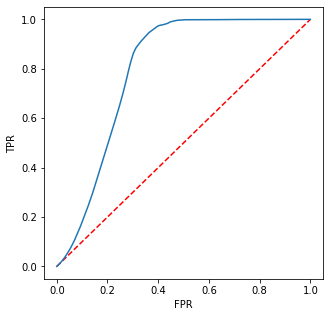

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fit_new.summary.roc.select('FPR').collect(),
         fit_new.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [0]:
train_new_results = fit_new.transform(df_train)
test_new_results = fit_new.transform(df_test)

In [0]:
train_new_results.summary.roc.select('FPR').collect()

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3616587118238617> in <module> 
 ----> 1 train_new_results . summary . roc . select ( 'FPR' ) . collect ( ) 

 AttributeError : 'function' object has no attribute 'roc'

In [0]:
AUC_test_new = AUC_eval.evaluate(train_new_results)
AUC_train_new = AUC_eval.evaluate(test_new_results)

Accu_test_new = Accu_evaluator.evaluate(test_new_results, {Accu_evaluator.metricName: "accuracy"})
Accu_train_new = Accu_evaluator.evaluate(train_new_results, {Accu_evaluator.metricName: "accuracy"})

In [0]:
print("Test AUC with Label Encoding & feature selection", AUC_test_new)
print("Train AUC with Label Encoding & feature selection", AUC_train_new)
print("\n")
print("Test with Label Encoding & feature selection", Accu_test_new)
print("Train with Label Encoding & feature selection", Accu_train_new)

Test AUC with Label Encoding & feature selection 0.7844037054287505
Train AUC with Label Encoding & feature selection 0.7847463020577701


Test with Label Encoding & feature selection 0.7817645267817411
Train with Label Encoding & feature selection 0.7815734344700834

In [0]:
df_new2.show()

+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+----------------+-------------------+-----------+----------------+--------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+----------+
 id|Gender|Age|Driving_License|Region_Code|Previously_Insured|Vehicle_Age|Vehicle_Damage|Annual_Premium|Policy_Sales_Channel|Vintage|Response|Vehicle_AgeIndex|Vehicle_DamageIndex|GenderIndex|Region_CodeIndex|Driving_LicenseIndex|Policy_Sales_ChannelIndex|Previously_InsuredIndex| features| rawPrediction| probability|prediction|
+-----+------+---+---------------+-----------+------------------+-----------+--------------+--------------+--------------------+-------+--------+----------------+-------------------+-----------+----------------+--------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+----------+
 10|Female| 32| 1| 6.0| 1| < 1 Year| No| 28771.0| 152.0| 80| 0| 1.0| 1.0| 1.0| 16.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,32.0...|[19.5847764881691...|[0.97923882440845...| 0.0|
 100|Female| 24| 1| 7.0| 1| < 1 Year| Yes| 2630.0| 160.0| 68| 0| 1.0| 0.0| 1.0| 25.0| 0.0| 3.0| 1.0|[1.0,1.0,0.0,24.0...|[17.5724426455168...|[0.87862213227584...| 0.0|
 1000|Female| 21| 1| 46.0| 1| < 1 Year| No| 29298.0| 160.0| 37| 0| 1.0| 1.0| 1.0| 2.0| 0.0| 3.0| 1.0|[1.0,1.0,1.0,21.0...|[19.6714306338571...|[0.98357153169285...| 0.0|
10000|Female| 25| 1| 45.0| 1| < 1 Year| No| 18843.0| 152.0| 131| 0| 1.0| 1.0| 1.0| 14.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,25.0...|[19.7026847688796...|[0.98513423844398...| 0.0|
10001| Male| 40| 1| 11.0| 1| 1-2 Year| Yes| 2630.0| 124.0| 289| 0| 0.0| 0.0| 0.0| 8.0| 0.0| 2.0| 1.0|[0.0,0.0,0.0,40.0...|[17.7766908251459...|[0.88883454125729...| 0.0|
10002| Male| 21| 1| 41.0| 1| < 1 Year| No| 31438.0| 160.0| 243| 0| 1.0| 1.0| 0.0| 3.0| 0.0| 3.0| 1.0|[0.0,1.0,1.0,21.0...|[19.6714306338571...|[0.98357153169285...| 0.0|
10004|Female| 24| 1| 28.0| 1| < 1 Year| No| 32564.0| 152.0| 234| 0| 1.0| 1.0| 1.0| 0.0| 0.0| 1.0| 1.0|[1.0,1.0,1.0,24.0...|[19.6589305313193...|[0.98294652656596...| 0.0|
10006| Male| 56| 1| 8.0| 0| 1-2 Year| Yes| 46359.0| 26.0| 279| 0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0| 0.0|(10,[3,5,7,9],[56...|[5.17021185316602...|[0.25851059265830...| 1.0|
10007| Male| 56| 1| 8.0| 1| 1-2 Year| No| 32284.0| 124.0| 265| 0| 0.0| 1.0| 0.0| 1.0| 0.0| 2.0| 1.0|[0.0,0.0,1.0,56.0...|[19.5141800316432...|[0.97570900158216...| 0.0|
10008| Male| 39| 1| 28.0| 0| 1-2 Year| Yes| 37999.0| 124.0| 155| 0| 0.0| 0.0| 0.0| 0.0| 0.0| 2.0| 0.0|(10,[3,7,8,9],[39...|[5.09911653917955...|[0.25495582695897...| 1.0|
 1001| Male| 49| 1| 18.0| 0| 1-2 Year| Yes| 47406.0| 26.0| 212| 0| 0.0| 0.0| 0.0| 15.0| 0.0| 0.0| 0.0|(10,[3,5,7,9],[49...|[5.30670067941940...|[0.26533503397097...| 1.0|
10010|Female| 55| 1| 28.0| 0| 1-2 Year| Yes| 38997.0| 120.0| 18| 0| 0.0| 0.0| 1.0| 0.0| 0.0| 28.0| 0.0|(10,[0,3,7,8,9],[...|[6.15853120028317...|[0.30792656001415...| 1.0|
10011| Male| 42| 1| 28.0| 1| 1-2 Year| No| 2630.0| 60.0| 128| 0| 0.0| 1.0| 0.0| 0.0| 0.0| 32.0| 1.0|[0.0,0.0,1.0,42.0...|[19.4455427427405...|[0.97227713713702...| 0.0|
10012| Male| 48| 1| 30.0| 0| 1-2 Year| Yes| 36503.0| 124.0| 93| 0| 0.0| 0.0| 0.0| 6.0| 0.0| 2.0| 0.0|(10,[3,5,7,8,9],[...|[5.24547816650354...|[0.26227390832517...| 1.0|
10013| Male| 40| 1| 28.0| 0| 1-2 Year| No| 37883.0| 124.0| 92| 0| 0.0| 1.0| 0.0| 0.0| 0.0| 2.0| 0.0|(10,[2,3,7,8,9],[...|[15.9288014929295...|[0.79644007464647...| 0.0|
10014| Male| 34| 1| 7.0| 0| 1-2 Year| No| 35453.0| 124.0| 261| 0| 0.0| 1.0| 0.0| 25.0| 0.0| 2.0| 0.0|[0.0,0.0,1.0,34.0...|[16.4336739121045...|[0.82168369560522...| 0.0|
10016| Male| 28| 1| 36.0| 1| < 1 Year| No| 45872.0| 152.0| 285| 0| 1.0| 1.0| 0.0| 10.0| 0.0| 1.0| 1.0|[0.0,1.0,1.0,28.0...|[19.7026847688796...|[0.98513423844398...| 0.0|
10018| Male| 56| 1| 28.0| 0| 1-2 Year| Yes| 39835.0| 124.0| 98| 0|

# The result barely changed

# Crossvalidation for checking overfitting

In [0]:
df_cv = df_new2.withColumn('feature',  df_new2.Gender)
df_cv1 = df_cv.withColumn('label',df_new2.Response)
df_cv2 = df_cv1.drop('prediction')
df_cv3 = df_cv2.drop('rawPrediction')
df_cv4 = df_cv3.drop('probability')

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
lr = LogisticRegression(maxIter=10)
pipeline=Pipeline(stages=[lr])
paramGrid=ParamGridBuilder().addGrid(lr.regParam,[0.1,0.01]).build()
crossval = CrossValidator(estimator=pipeline,
                         estimatorParamMaps = paramGrid,
                         evaluator = BinaryClassificationEvaluator(),
                         numFolds =5)
cvModel = crossval.fit(df_cv4)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
trainingsummary = cvModel.bestModel.stages[-1].summary

In [0]:
print(trainingsummary.objectiveHistory)

[0.6930386827422197, 0.48839421059119215, 0.47979875722475274, 0.47632208621752437, 0.46862621333622223, 0.4671331646501549, 0.466456985274213, 0.46570516257416383, 0.4647560636737555, 0.4638274212196689, 0.46355722759329393]

In [0]:
trainingsummary.roc.show()

+--------------------+--------------------+
 FPR| TPR|
+--------------------+--------------------+
 0.0| 0.0|
0.008069931733673066|0.021088325145930734|
0.015794502622823746|0.044330536574569916|
0.023469188056654527| 0.06780987309855314|
 0.03138178873893406| 0.08972813607818805|
 0.03921380522415838| 0.11210484090882145|
0.046999773596779704| 0.1348016646181693|
 0.04923310705802446| 0.14071398366208093|
 0.0570229127733627| 0.1634305677960408|
 0.06454794184123379| 0.18782678802202102|
 0.07213820573529242| 0.21191079353913156|
 0.07995103550693217| 0.23450091095557463|
 0.08778305199215647| 0.256838094936984|
 0.09560739379194695| 0.27947168528757343|
 0.0956918153317191| 0.2796495291090815|
 0.1035737172722633| 0.30174958799514684|
 0.11152085403899507| 0.32366785097478173|
 0.1194296173785577| 0.34559006603933906|
 0.1272117484084621| 0.36827898557884214|
 0.13472526544818245| 0.39287676213586475|
+--------------------+--------------------+
only showing top 20 rows

In [0]:
#ref 